# Lab 3

In [111]:
# 1. Defines a function that produces a numerical aproximation of a nuclear decay.
from pylab import exp
def populationNumerical(Ni, r, time):
    """ Accepts an initial value of nuclei, a lambda value, and a time array, and returns an array with a numerical
    approximation of the amount of nucleiat each time in the time array.
    The arguements are the initial number of nuclei, the lambda value, and the time of decay.
    The result is the numerical approximation of the number of nuclei at the given time."""
    ti = 0
    N = [Ni]
    for instant in range(len(time)):
        t = (instant * max(time)) / len(time)
        delta_t = t-ti
        N.append(N[instant]+(-r*N[instant])*(delta_t))
        ti = t
    N.pop()
    return N

In [74]:
# 2. Defines a function that an exact nuclear decay.
def populationExact(Ni, r, time):
    """ Accepts an initial value of nuclei, a lambda value, and a time array, and returns an array with the exact
    amount of nuclei at each time in the time array.
    The arguements are the initial value of nuclei, the lambda value, and the time of decay. 
    The result is the exact final number if nucei."""
    N = Ni * exp(-time*r)
    return N

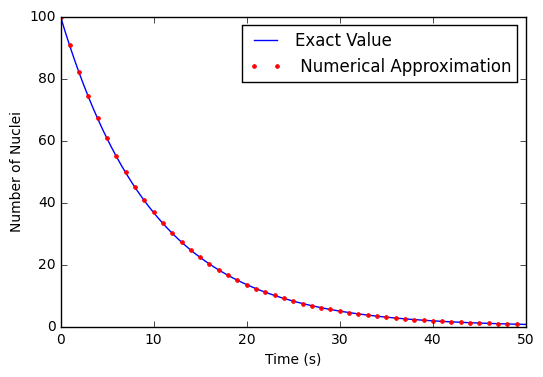

In [130]:
# Plots the same decay using the two different methods on the same plot.
%matplotlib inline
from pylab import plot, show, xlabel, ylabel, legend, title
from numpy import linspace
time = linspace(0,50,1000)
populationMap = populationNumerical(100,0.1,time)
populationAnalytic = populationExact(100,0.1,time)
plot(time,populationAnalytic, "b", label = "Exact Value")
plot(time,populationMap, "r.", markevery = 20, label = " Numerical Approximation")
xlabel("Time (s)")
ylabel("Number of Nuclei")
legend(loc = "best")
show()

This graph representes a nuclear decay calculated with both an exact calcualtion, and numerical approximation of the number of nuclei at a given time. The numerical approximation uses the Euler method. It is more accurate when delta t is smaller, and less accurate when delta t is larger.

In [131]:
# 5. Defines a function that calculates the number of B nuclei, where the A nuclei decay into B nuclei.
def coupled(NA, NBi, rA, rB, time):
    """ Accepts an array of population A at various times, the initial value of the B population, 
    a lambda value for each popualation, and a time array, and returns an array of B population values at each time in the 
    time array. 
    The arguements are the number of A nuclei at the given time, the initial number of B nuclei, the A lambda value, 
    the B lambda value, and the time of decay. 
    The result is the approximate final number if B nucei"""
    ti = 0
    NB = [NBi]
    for instant in range(len(time)):
        t = (instant * max(time)) / len(time)
        delta_t = t-ti
        NB.append(NB[instant] + (rA*NA[instant] - rB*NB[instant]) * (delta_t))
        ti = t
    NB.pop()
    return NB

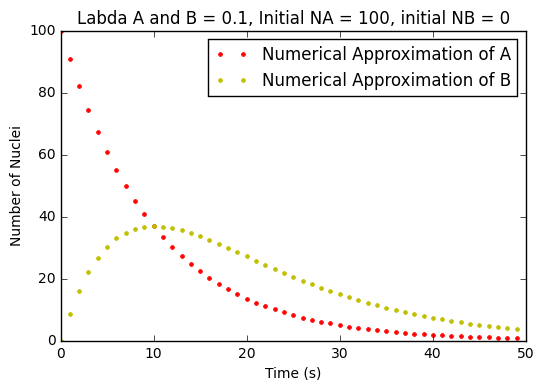

In [116]:
populationA = populationNumerical(100,0.1,time)
populationB = coupled(populationA, 0, 0.1, 0.1, time)
plot(time,populationA,"r.",markevery = 20, label = "Numerical Approximation of A")
plot(time,populationB,"y.",markevery = 20, label = "Numerical Approximation of B")
title("Labda A and B = 0.1, Initial NA = 100, initial NB = 0")
xlabel("Time (s)")
ylabel("Number of Nuclei")
legend(loc = "best")
show()

This plot shows the nuclear decay of two types of nuclei, A and B, where A turns into B when it decays. The red dots show the decay of material A, which follows the same pattern as the previous plot. The yellow dots represent the decay of mterial B, which increases initially due to the A nuclei that are decaying into B nuclei, and then decreses, since material b is radioactive as well. The following plots show different test cases with various starting values and lambda values for A and B.

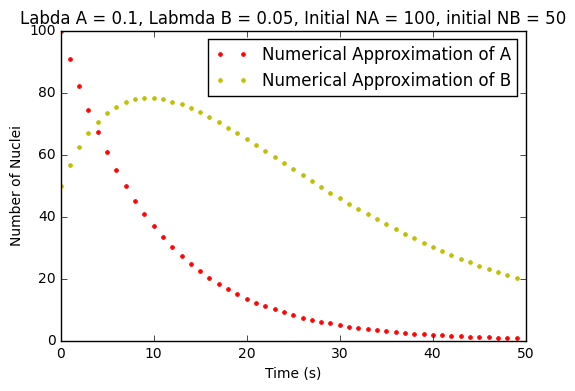

In [118]:
populationA = populationNumerical(100,0.1,time)
populationB = coupled(populationA, 50, 0.1, 0.05, time)
plot(time,populationA,"r.",markevery = 20, label = "Numerical Approximation of A")
plot(time,populationB,"y.",markevery = 20, label = "Numerical Approximation of B")
title("Labda A = 0.1, Labmda B = 0.05, Initial NA = 100, initial NB = 50")
xlabel("Time (s)")
ylabel("Number of Nuclei")
legend(loc = "best")
show()

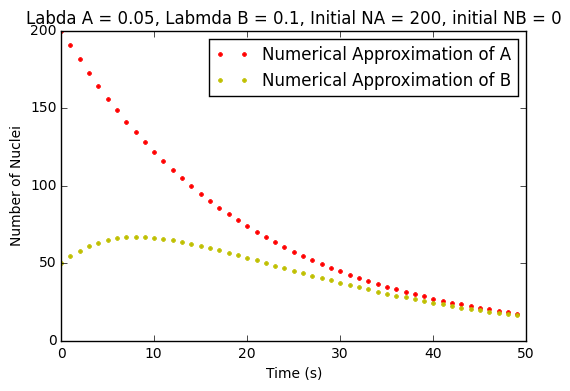

In [117]:
populationA = populationNumerical(200,0.05,time)
populationB = coupled(populationA, 50, 0.05, 0.1, time)
plot(time,populationA,"r.",markevery = 20, label = "Numerical Approximation of A")
plot(time,populationB,"y.",markevery = 20, label = "Numerical Approximation of B")
title("Labda A = 0.05, Labmda B = 0.1, Initial NA = 200, initial NB = 0")
xlabel("Time (s)")
ylabel("Number of Nuclei")
legend(loc = "best")
show()

In [120]:
from numpy import exp
def coupledExact(NAi, NBi, rA, rB, time):
    NB = ((rA*NAi)/(rB-rA))*exp(-rA*time)+(NBi-((rA*NAi)/(rB-rA)))*exp(-rB*time)
    return NB